Name :Pratham Shewale 
Class : TE-B
Roll-no: 22618

In [22]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

In [23]:
# Load Boston Housing Dataset
boston = fetch_openml(name='boston', version=1, parser="auto", as_frame=True)
df = boston.frame

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [24]:
print(boston)

{'data':         CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  \
0    0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0   
1    0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0   
2    0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0   
3    0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0   
4    0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0   
..       ...   ...    ...  ...    ...    ...   ...     ...  ..    ...   
501  0.06263   0.0  11.93    0  0.573  6.593  69.1  2.4786   1  273.0   
502  0.04527   0.0  11.93    0  0.573  6.120  76.7  2.2875   1  273.0   
503  0.06076   0.0  11.93    0  0.573  6.976  91.0  2.1675   1  273.0   
504  0.10959   0.0  11.93    0  0.573  6.794  89.3  2.3889   1  273.0   
505  0.04741   0.0  11.93    0  0.573  6.030  80.8  2.5050   1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4

In [25]:
# Convert categorical columns to float, for linear regression

df = df.replace("NA", 2)

df["CHAS"] = df["CHAS"].astype(float)
df["RAD"] = df["RAD"].astype(float)

df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [26]:
# Separate features and target variable
X = df.drop(columns=['MEDV'])  # Features
y = df['MEDV']  # Target variable

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [27]:
print(y_test)

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: MEDV, Length: 102, dtype: float64


In [28]:
model.score(X_test, y_test)

0.6687594935356317

In [29]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print Results
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 4.93
R^2 Score: 0.67


In [30]:
# Step 1: Select numeric columns
numeric_cols = df.select_dtypes(include=['number', 'float64' ,'int64']).columns

# Step 2: Drop rows with missing values in numeric columns
df_clean = df.dropna(subset=numeric_cols)
print("Before Cleaning:", df_clean.shape)

# Step 3: Dictionary to store outliers
outliers_dict = {}

# Step 4: Detect and store outliers per column
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df_clean[(df_clean[col] < lower) | (df_clean[col] > upper)]
    
    # Store if outliers are present
    if not outliers.empty:
        outliers_dict[col] = outliers[[col]]

    # Remove outliers from the data
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

print(f"\nFinal cleaned data shape: {df_clean.shape}")


Before Cleaning: (506, 14)

Final cleaned data shape: (214, 14)


In [31]:
print(outliers_dict.keys())

dict_keys(['CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])


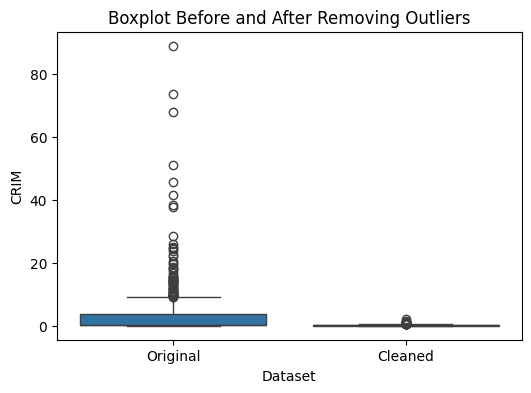

In [32]:
plot_df = pd.DataFrame({
    'CRIM': pd.concat([
        df['CRIM'],  # original
        df_clean['CRIM'],  # cleaned
    ], ignore_index=True),
    'Dataset': ['Original'] * len(df) + ['Cleaned'] * len(df_clean)
})

# Plot side-by-side boxplots
plt.figure(figsize=(6, 4))
sns.boxplot(x='Dataset', y='CRIM', data=plot_df)
plt.title("Boxplot Before and After Removing Outliers")
plt.show()
